###  import necessaries Libraries 

In [ ]:
# Import core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### load data

In [ ]:
# Read the dataset
data = pd.read_csv(r"C:\Users\Administrator\Downloads\Week4\Credit_Risk_Probability_Model_for_Alternative_Data\data\raw\transactions.csv")  # update path as needed

# Preview
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

### Overview of the Data

In [ ]:
# Number of rows and columns
print(f"Rows: {data.shape[0]}, Columns: {data.shape[1]}")

# Data types
data.dtypes

# Check for duplicates
data.duplicated().sum()


Rows: 95662, Columns: 16


np.int64(0)

### Summary Statistics

In [ ]:
# Numeric summary
data.describe()

# Categorical summary
data.describe(include='object')


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStartTime
count,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662
unique,95662,94809,3633,3627,3742,1,6,23,9,4,94556
top,TransactionId_76871,BatchId_67019,AccountId_4841,SubscriptionId_3829,CustomerId_7343,UGX,ProviderId_4,ProductId_6,financial_services,ChannelId_3,2018-12-24T16:30:13Z
freq,1,28,30893,32630,4091,95662,38189,32635,45405,56935,17


### Distribution of Numerical Features

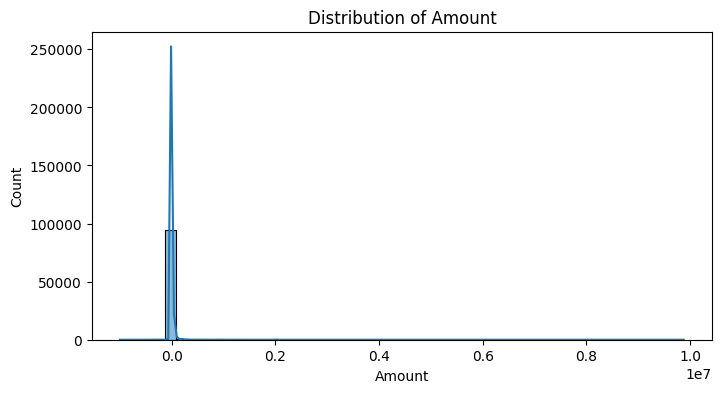

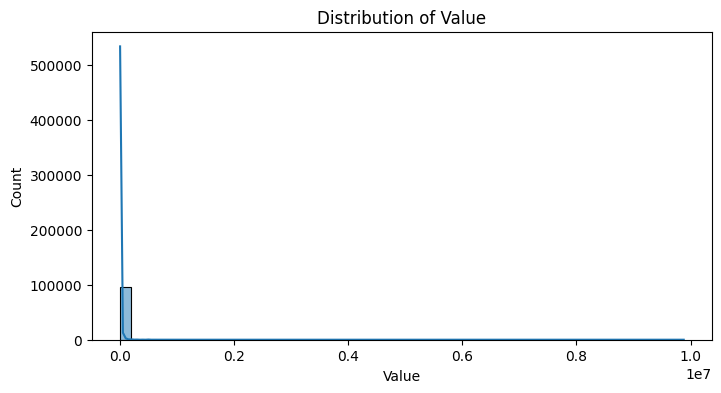

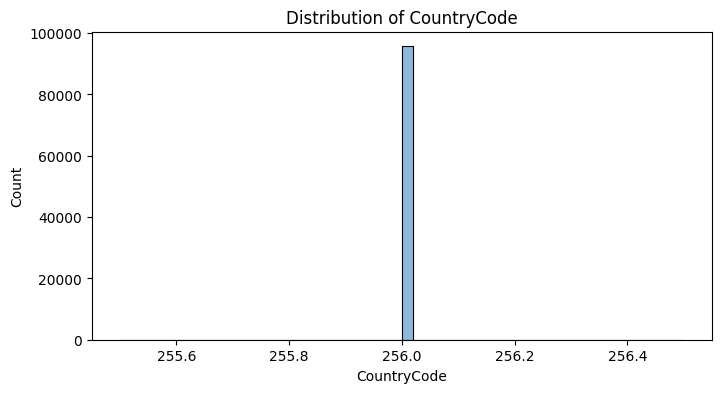

In [ ]:
numeric_cols = ['Amount', 'Value', 'CountryCode']  # adjust as needed

for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(data[col], bins=50, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


### Distribution of Categorical Features

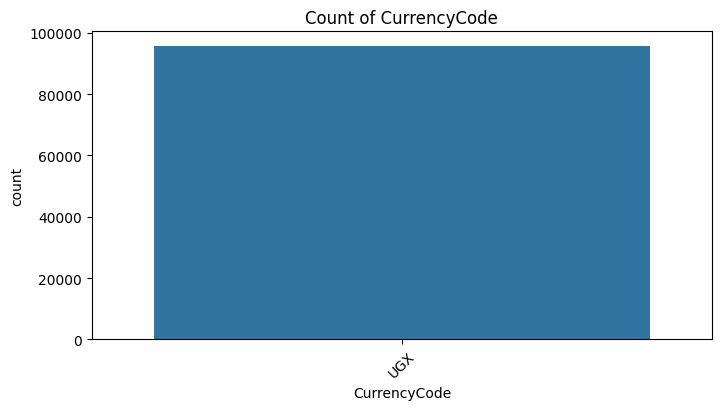

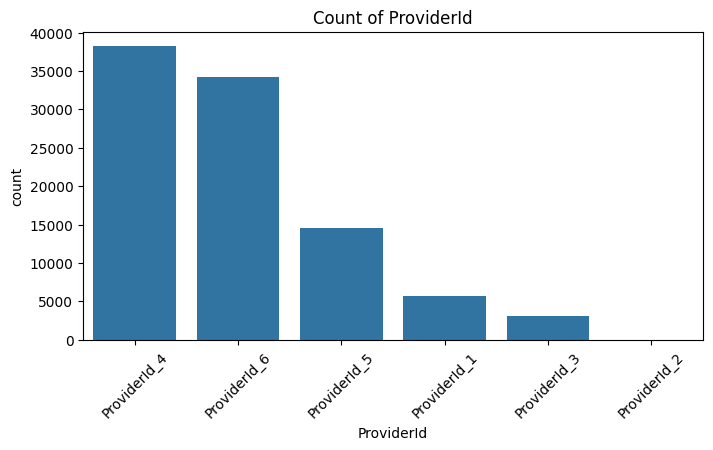

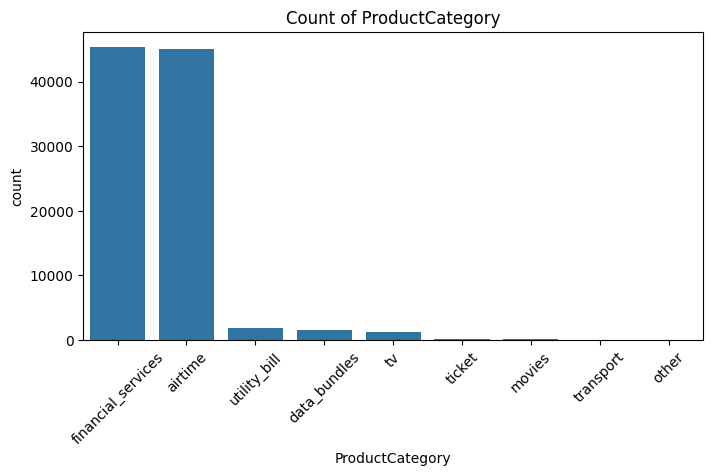

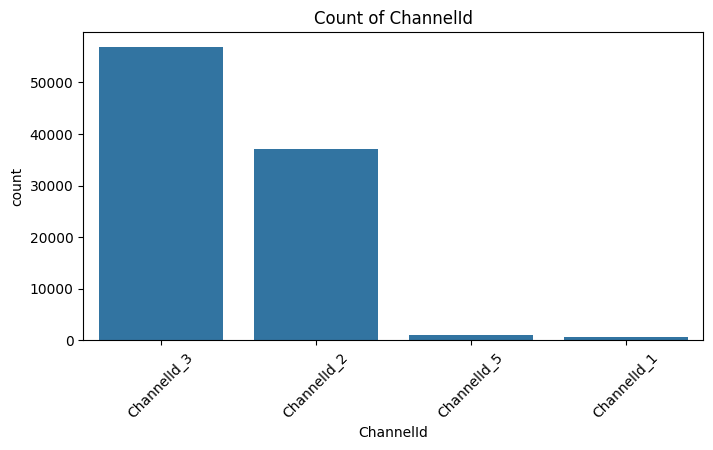

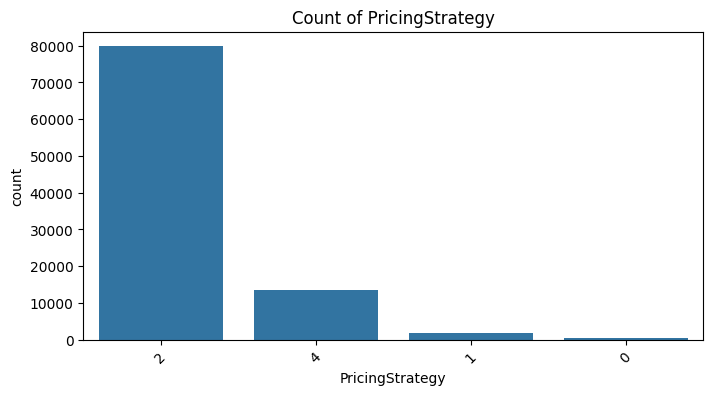

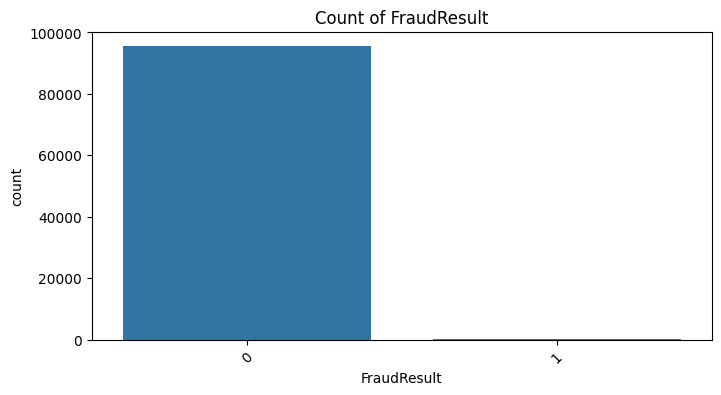

In [ ]:
categorical_cols = ['CurrencyCode', 'ProviderId', 'ProductCategory', 'ChannelId', 'PricingStrategy', 'FraudResult']

for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=data, order=data[col].value_counts().index)
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
    plt.show()


### Correlation Analysis

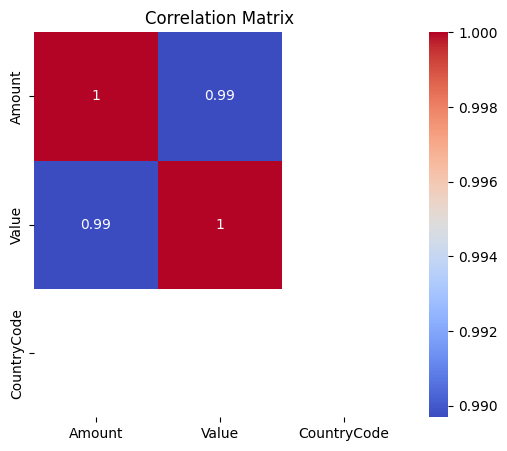

In [ ]:
# Correlation of numerical features
corr = data[numeric_cols].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


### Missing Values

In [ ]:
# Check missing values
missing = data.isnull().sum().sort_values(ascending=False)
missing_percent = (data.isnull().sum()/len(data))*100

missing_df = pd.DataFrame({"MissingCount": missing, "MissingPercent": missing_percent})
missing_df


,MissingCount,MissingPercent
TransactionId,0,0.0
BatchId,0,0.0
AccountId,0,0.0
SubscriptionId,0,0.0
CustomerId,0,0.0
CurrencyCode,0,0.0
CountryCode,0,0.0
ProviderId,0,0.0
ProductId,0,0.0
ProductCategory,0,0.0


### Outlier Detection

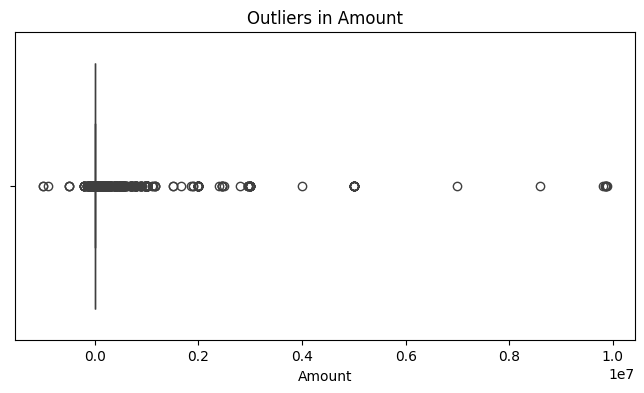

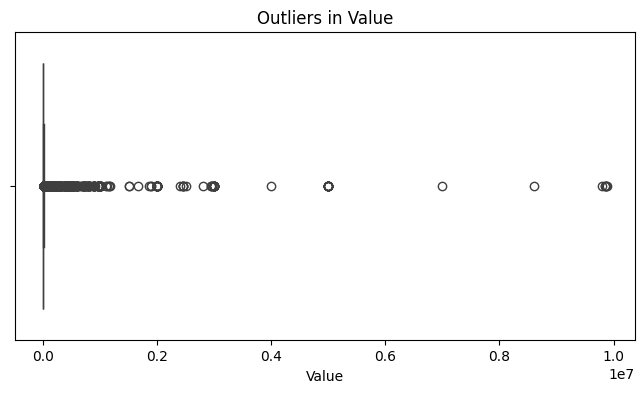

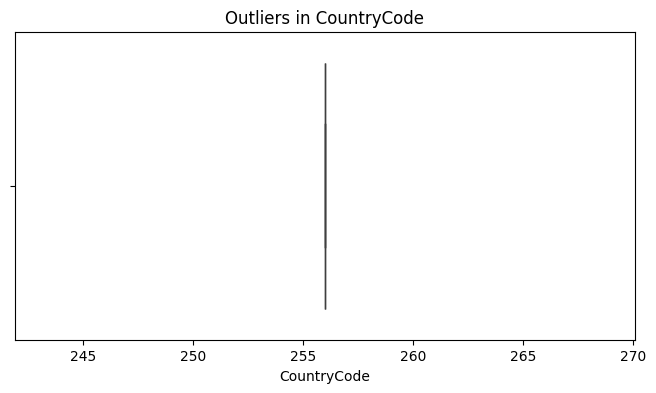

In [ ]:
# Boxplots for numerical features
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=data[col])
    plt.title(f"Outliers in {col}")
    plt.show()


### Time-based Analysis

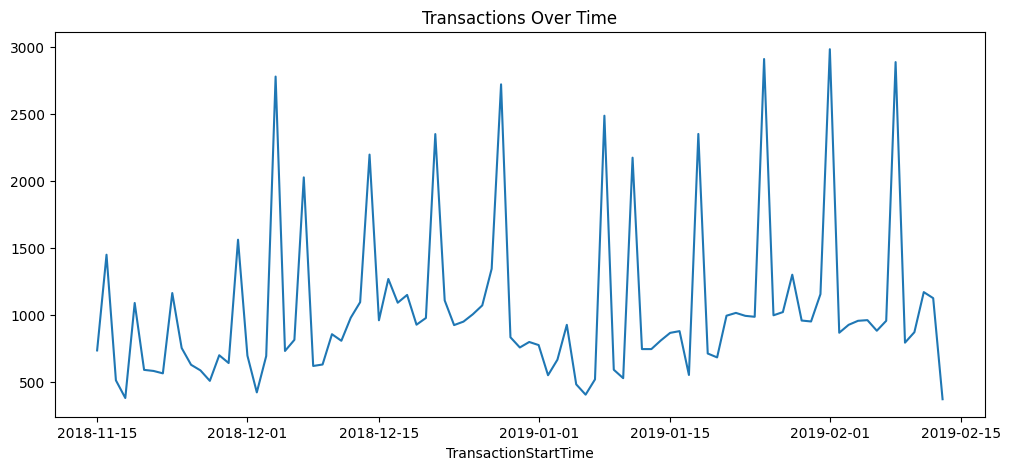

In [ ]:
# Convert to datetime
data['TransactionStartTime'] = pd.to_datetime(data['TransactionStartTime'])

# Plot transactions over time
plt.figure(figsize=(12,5))
data.groupby(data['TransactionStartTime'].dt.date)['TransactionId'].count().plot()
plt.title("Transactions Over Time")
plt.show()


### Top 5 Insights

Insight 1: Dataset Quality and Size: The dataset contains 95,662 unique transactions across 16 columns, with no missing values or duplicates, indicating high data integrity and readiness for analysis without extensive cleaning.

Insight 2: Uniform Currency and Location: All transactions use the Ugandan Shilling (UGX) as the currency, and the CountryCode is consistently 256 (Uganda), suggesting the data is geographically focused on a single market.

Insight 3: High Concentration in Key Entities: There is significant skew in usage patterns—one account (AccountId_4841) accounts for ~32% of transactions (30,893), one provider (ProviderId_4) handles ~40% (38,189), and one channel (ChannelId_3) is used for ~60% (56,935), highlighting potential dependencies or dominant players.

Insight 4: Dominant Product and Category: The "financial_services" category dominates with ~47% of transactions (45,405), and ProductId_6 is the most common product (~34%, 32,635 transactions), indicating a focus on financial-related activities in the dataset.

Insight 5: Transaction Timing Patterns: Transaction start times show some clustering, with the most frequent timestamp (2018-12-24T16:30:13Z) occurring 17 times, and the time-series plot reveals daily transaction volume trends, potentially useful for identifying peaks or seasonal patterns.